In [1]:
from clouds_classification import CloudsClassifier

In [2]:
train_dit = "dataset/train"
valid_dir = "dataset/valid"
img_height = 200
img_width = 200
batch_size = 32

model_name = "ResNet50V2"

In [3]:
classifier = CloudsClassifier(
    train_dir=train_dit,
    valid_dir=valid_dir,
    img_height=img_height,
    img_width=img_width,
    batch_size=batch_size,
)

Création du dataset d'entraînement...
Chargement des données depuis : dataset/train
Chargement depuis 'dataset/train': 1502 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Création du dataset de validation...
Chargement des données depuis : dataset/valid
Chargement depuis 'dataset/valid': 145 images trouvées pour les classes ['altocumulus', 'altostratus', 'cirrocumulus', 'cirrostratus', 'cirrus', 'cumulonimbus', 'cumulus', 'nimbostratus', 'stratocumulus', 'stratus'].

Les datasets sont prêts.


In [4]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

model_name = "EfficientNetB0"

classifier.add_model(
    name=model_name,
    model_class=EfficientNetB0,
    preprocess_function=preprocess_input,
)

Modèle 'EfficientNetB0' ajouté au registre avec succès.


In [5]:
classifier.build_model(base_model_name=model_name)

Modèle construit avec EfficientNetB0 comme base.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 200, 200, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,062,381 (15.50 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
try:
    classifier.load_model(model_name + ".keras")
except:
    classifier.train(epochs=50, fine_tune_epochs=30, model_name=model_name, learning_rate=1e-6)
    classifier.plot_history()

Modèle chargé avec succès depuis EfficientNetB0.keras
Dimensions d'entrée du modèle mises à jour : 200x200



--- Phase 1: Entraînement de la tête de classification ---
Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 325ms/step - accuracy: 0.2049 - loss: 2.2004 - val_accuracy: 0.3793 - val_loss: 1.8190
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 302ms/step - accuracy: 0.4530 - loss: 1.7193 - val_accuracy: 0.5241 - val_loss: 1.5647
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 326ms/step - accuracy: 0.5328 - loss: 1.4787 - val_accuracy: 0.5724 - val_loss: 1.4339
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 314ms/step - accuracy: 0.5835 - loss: 1.3662 - val_accuracy: 0.5862 - val_loss: 1.3464
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 316ms/step - accuracy: 0.6208 - loss: 1.2523 - val_accuracy: 0.6276 - val_loss: 1.2881
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - accuracy: 0.6204 - loss: 1.2140 - val_accuracy: 0.6345 - val_loss: 1.2403
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 310ms/step - accuracy: 0.6569 - loss: 1.1247 - val_accuracy: 0.6552 - val_loss: 1.1932
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━

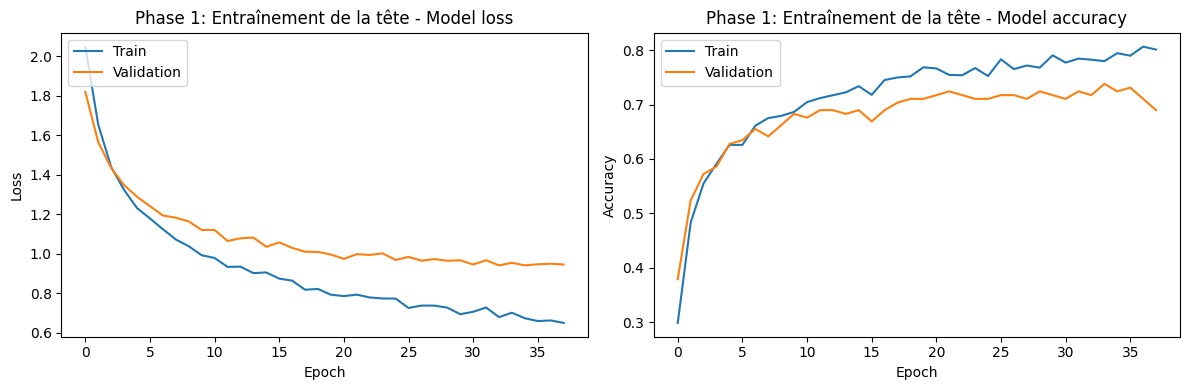

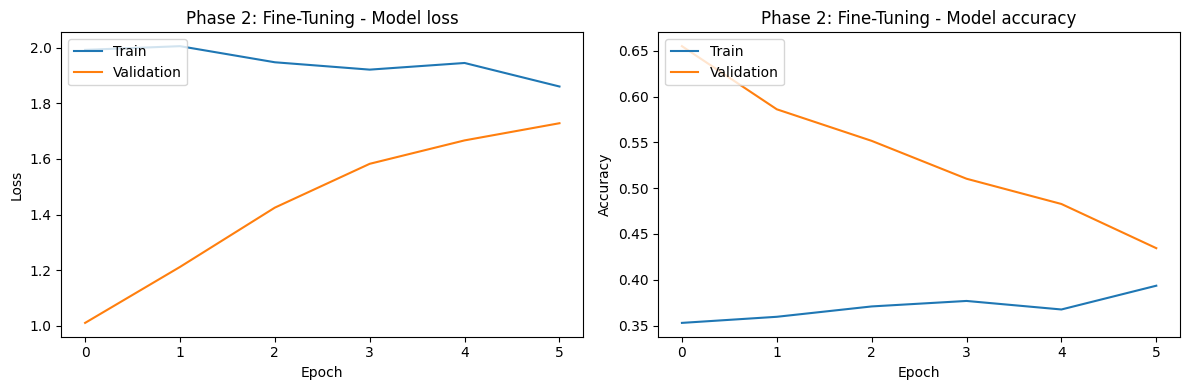

In [6]:
classifier.train(epochs=50, fine_tune_epochs=30, model_name=model_name, learning_rate_ft=1e-6)
classifier.plot_history()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
Prédiction: stratocumulus (99.14%)


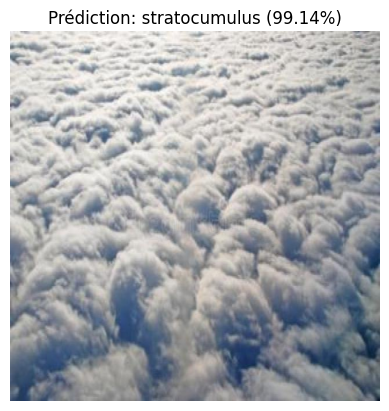

In [ ]:
img_path = "dataset/test/Ac-N053-33-_jpg.rf.6b6f2ae38015d73a335d80b7e5cb8f5d.jpg"
img_path = "dataset/test/27949466-091d-47c0-b206-5920d2133e41_jpg.rf.4189ec0e892ac4ceb9be2e1eb04f8e3b.jpg"

predicted_class_name, confidence = classifier.predict(img_path)

In [7]:
import pandas as pd
import os 

class_test = pd.read_csv("dataset/test/_classes.csv", sep=",")

good_answer = 0
wrong_answer = 0
for img_path in class_test["filename"]:
    row = class_test[class_test["filename"] == img_path].iloc[0]
    true_class_name = row[row == 1].index[0]
    predicted_class_name, confidence = classifier.predict(os.path.join(f"dataset/test/{img_path}"), show_image=False)

    if true_class_name == predicted_class_name:
        good_answer +=1
    else:
        wrong_answer +=1

print(f"Bonnes réponses : {good_answer} sur {good_answer + wrong_answer}")
print(f"Mauvaises réponses : {wrong_answer} sur {good_answer + wrong_answer}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 714ms/step
Prédiction: cumulonimbus (29.25%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction: nimbostratus (57.96%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction: cirrostratus (80.31%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prédiction: altostratus (31.44%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Prédiction: nimbostratus (25.72%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction: cirrus (92.21%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction: cumulonimbus (94.54%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction: cumulonimbus (87.63%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prédiction: stratus (86.75%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prédiction: stratus (50.70%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prédiction: cumulonimbus (84.56%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prédiction: nimbostratus (63.03%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prédiction: nimbostratus (62.95%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prédiction: altostratus (30.59%)
1/1 ━━━━━